In [1]:
import pandas as pd

In [2]:
answers = pd.read_excel("data/answers.xlsx", index_col=None, header=0, skiprows=1, parse_dates=["Timestamp"], )
# fill in-place empty answers
answers.fillna("", inplace=True)

In [3]:
# Setting Categorical Data for "Multiple-Choice" Questions

from pandas.api.types import CategoricalDtype
from form import ROLES, AGE_RANGE, COMPANY_SIZE, COMPANY_TYPE, WOMEN_RATIO, WOMEN_CIRCLE, DIVERSITY_POLICY

# Role Cat
answers["role_cat"] = answers.Role.apply(lambda a: a if a in ROLES else "Other").astype("category")
answers["Role"] = answers["Role"].astype("category")

# Age
age_ranges = CategoricalDtype(categories=AGE_RANGE, ordered=True)
answers["Age"] = answers["Age"].astype(age_ranges)

# Gender
answers["Gender"] = answers["Gender"].astype("category")

# Company Size
company_size_cat = CategoricalDtype(categories=COMPANY_SIZE, ordered=True)
answers["Company_Size"] = answers["Company-Size"].astype(company_size_cat)

# Company Type
answers["Company_Type"] = answers["Company-Based"].apply(lambda a: a if a in COMPANY_TYPE else "Other").astype("category")

# Woman Ratio
company_women_ratio_cat = CategoricalDtype(categories=WOMEN_RATIO)
answers["Company_Women_Ratio"] = answers["Gender-gap"].astype(company_women_ratio_cat)

# Women in Network (~= Outreach)
women_in_circle_cat = CategoricalDtype(categories=WOMEN_CIRCLE)
answers["Women_Circle"] = answers["Gender-outreach"].astype(women_in_circle_cat)

# Company Diversity
company_diversity_policy_cat = CategoricalDtype(categories=DIVERSITY_POLICY)
answers["Company_Diversity_Policy"] = answers["Company-Diversity"].astype(company_diversity_policy_cat)

# Descrizione del Campione

In [4]:
from plot import bar_plot

from IPython.display import Markdown as Markdown

header = lambda s: Markdown(f"### {s}")

In [6]:
from form import ROLES_QUESTION

header(ROLES_QUESTION)

### Qual è la tua occupazione?

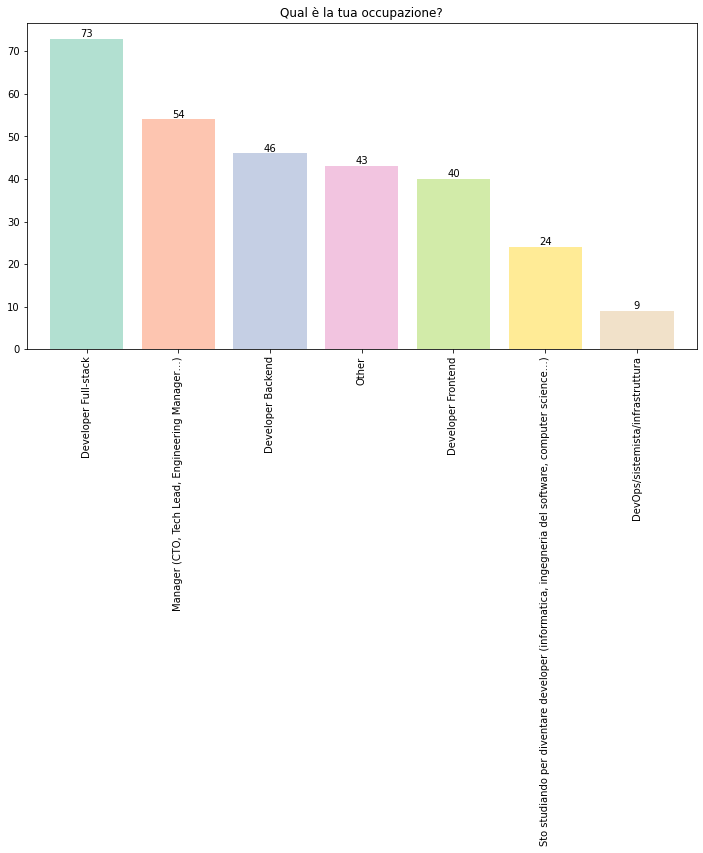

In [7]:
bar_plot(df=answers, columns=["role_cat"], title=ROLES_QUESTION, 
         width=0.8, sorted="values", ticks_rotation=90, legend=False)

In [8]:
other_roles = answers[answers.role_cat == "Other"]["Role"].value_counts()
pd.DataFrame({"Other Roles": other_roles.index.values, "Count": other_roles.values}).head(n=8)

,Other Roles,Count
0,Data scientist,3
1,Analista funzionale,2
2,Consulente,2
3,Studente autodidatta,1
4,QA,1
5,Responsabile della comunicazione in una Softwa...,1
6,Ricercatore,1
7,Security analyst and developer,1


---

In [9]:
from form import GENDER_QUESTION

header(GENDER_QUESTION)

### Ti riconosci come...?

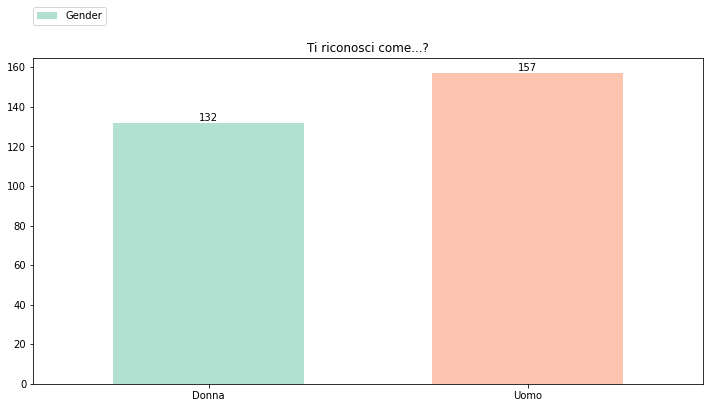

In [11]:
bar_plot(df=answers, columns=["Gender"], title=GENDER_QUESTION, width=0.6, legend=False)

In [12]:
from form import AGE_RANGE_QUESTION

header(AGE_RANGE_QUESTION)

### Quanti anni hai ?

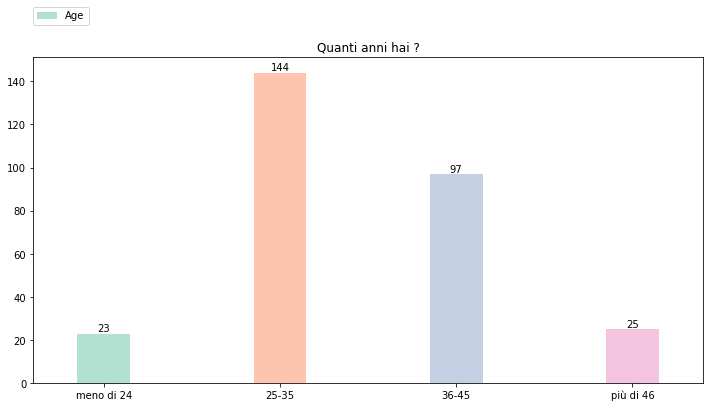

In [13]:
bar_plot(df=answers, columns=["Age"], title=AGE_RANGE_QUESTION, width=0.3)

**Distribuzione dell'età dei partecipanti nel campione** per Genere

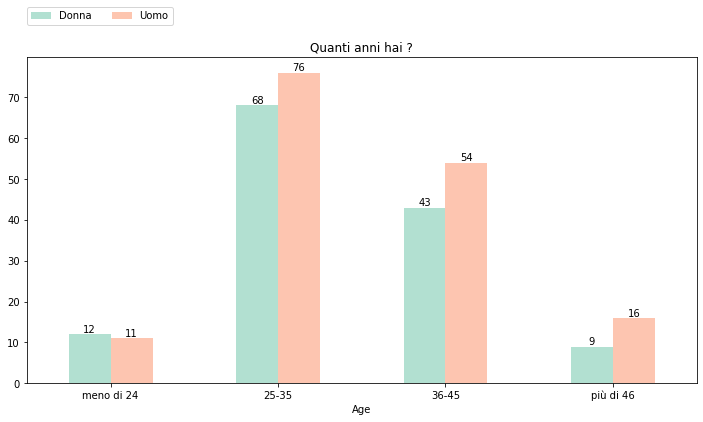

In [15]:
bar_plot(df=answers, columns=["Gender", "Age"], title=AGE_RANGE_QUESTION, width=0.5, unstack_ord=(0, ))

In [32]:
from form import MOTIVATIONS_QUESTION

header(MOTIVATIONS_QUESTION)

### Perché hai scelto di studiare/lavorare nel campo dell’informatica e della programmazione?

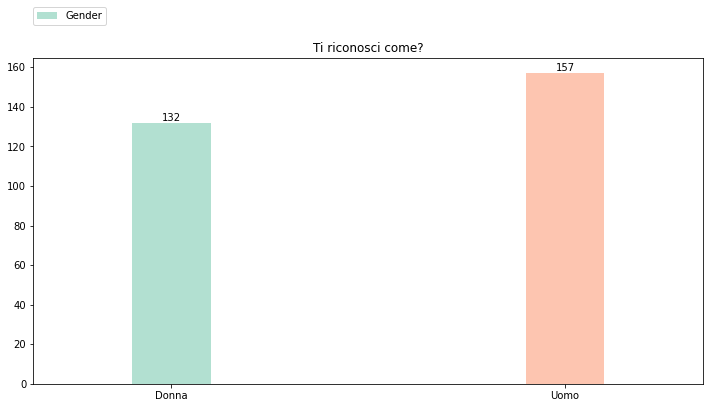

**Age-range Distribution** in Survey

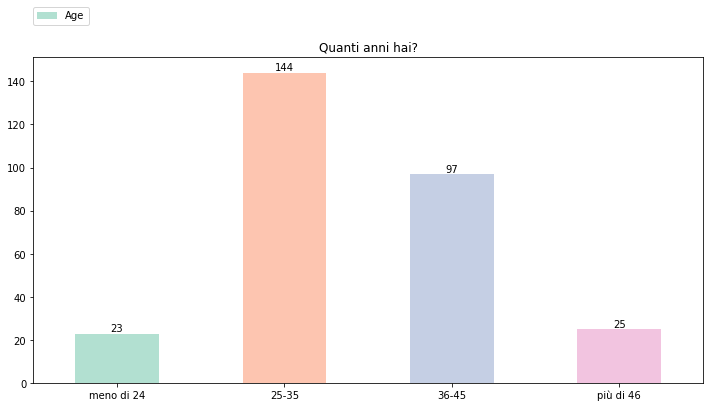

In [9]:
bar_plot(df=answers, columns=["Age"], title="Quanti anni hai?", filename="age-distribution.pdf")

**Age distribution** (Stratified by `Gender`)

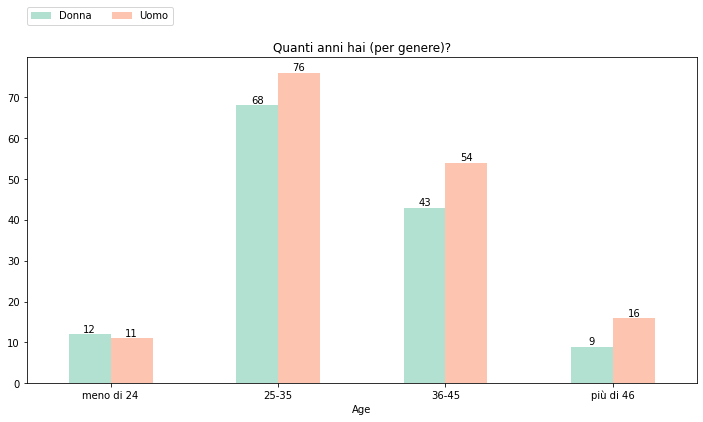

In [10]:
bar_plot(df=answers, columns=["Gender", "Age"], unstack_ord=(0, ), title="Quanti anni hai (per genere)?", filename="age-gender-distribution.pdf")

**IT Role**

Categorical Type on IT Role (simplifying entries in Survey)

In [11]:
def role_group_cat(value):
    value = value.strip().lower()
    if "stud" in value:
        return "Student"
    if "dev" in value or "sviluppatore" in value or "programmer" in value:
        return "Developer"
    if "manager" in value or "professor" in value:
        return "Manager/Professor"
    if "engineer" in value or "cloud" in value:
        return "Engineer"
    if "data" in value or "analista" in value or "ricercatore" in value:
        return "Data Science"
    if "help desk" in value or "consulente" in value:
        return "Non-Dev"
    if value in ("qa", "digital strategist", "legal", "event assistant", "responsabile della comunicazione in una software house","web designer"):
        return "Non-Dev"
    if "disoccupata" in value:
        return "Other"

role_cat_type = CategoricalDtype(categories=["Student", "Developer", "Engineer", "Data Science", "Manager/Professor", "Non-Dev", "Other"], ordered=True)
answers["role_group"] = answers.Role.apply(role_group_cat).astype(role_cat_type)

In [12]:
answers.role_group.unique().tolist()

['Developer',
 'Manager/Professor',
 'Data Science',
 'Student',
 'Non-Dev',
 'Other',
 'Engineer']

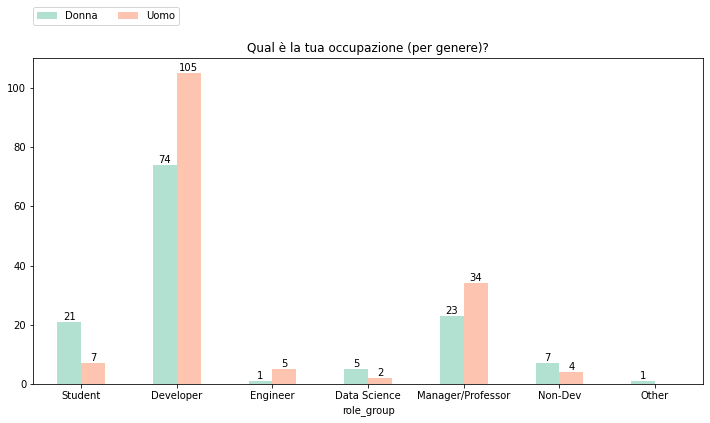

In [13]:
bar_plot(df=answers, columns=["Gender", "role_group"], unstack_ord=(0, ), title="Qual è la tua occupazione (per genere)?", filename="role-gender-distribution.pdf")

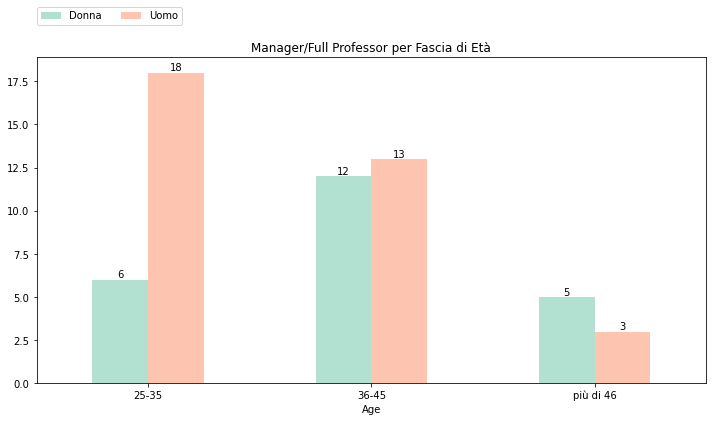

In [14]:
bar_plot(df=answers, columns=["Gender", "Age"], selection=answers.role_group == "Manager/Professor",
         unstack_ord=(0, ),
         title="Manager/Full Professor per Fascia di Età", filename="gender-manager-age.pdf")

**Employment State** (Stratified by Gender)

In [15]:
def employment(value):
    value = value.strip().lower()
    if value == "non lavoro":
        return "disoccupato"
    else:
        return "occupato"

answers["employment"] = answers.Company.apply(employment).astype("category")

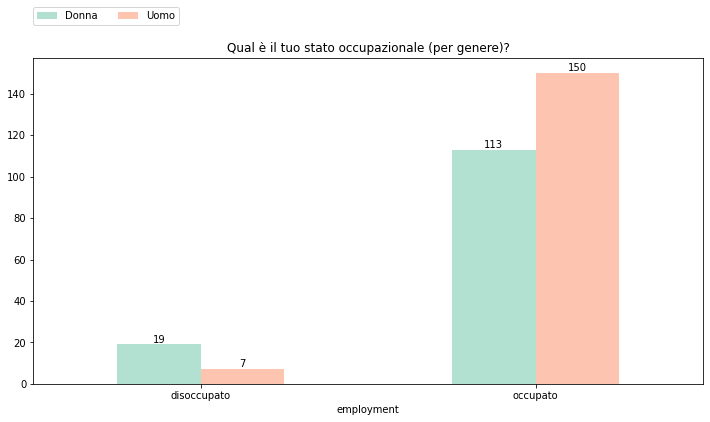

In [16]:
bar_plot(df=answers, columns=["Gender", "employment"], unstack_ord=(0, ), title="Qual è il tuo stato occupazionale (per genere)?", filename="gender-occupation.pdf")

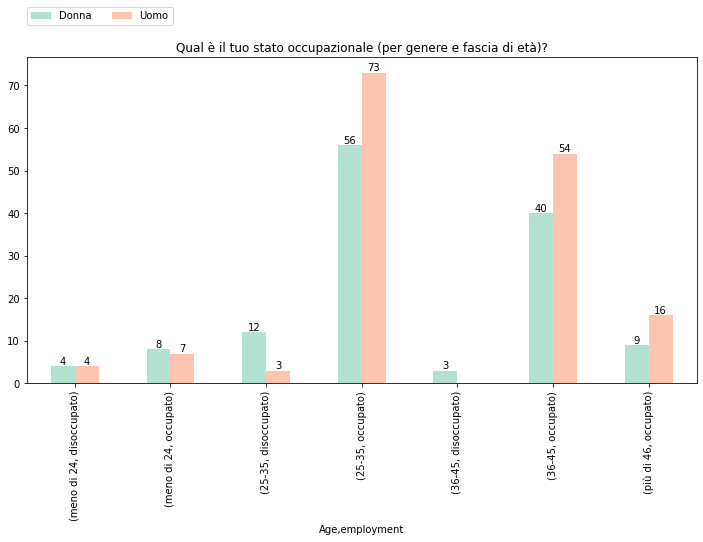

In [17]:
bar_plot(df=answers, columns=["Gender", "Age", "employment"], unstack_ord=(0, ),
         title="Qual è il tuo stato occupazionale (per genere e fascia di età)?",
         filename="gender-age-occupation.pdf", ticks_rotation=90)

**Motivations** Analysed per Gender and Age Range

Participants were asked what were their motivation to join their path in Computer Science and Engineering. 
Multiple choices were possible, along with a completely open `Other` answer.

Therefore, all _unique_ motivations found in the dataset will be analysed and counted for each participant.

In [18]:
from utils import process_multiple_choices
from utils import MOTIVATIONS

In [19]:
motivations, motivation_map = process_multiple_choices(answers.Motivation, choices=MOTIVATIONS)

motivations_data = {"Gender": answers.Gender.values, "Age": answers.Age.values, "role_group": answers.role_group.values}
motivations_data.update(zip(motivations, motivation_map))
motivations_df = pd.DataFrame(motivations_data)

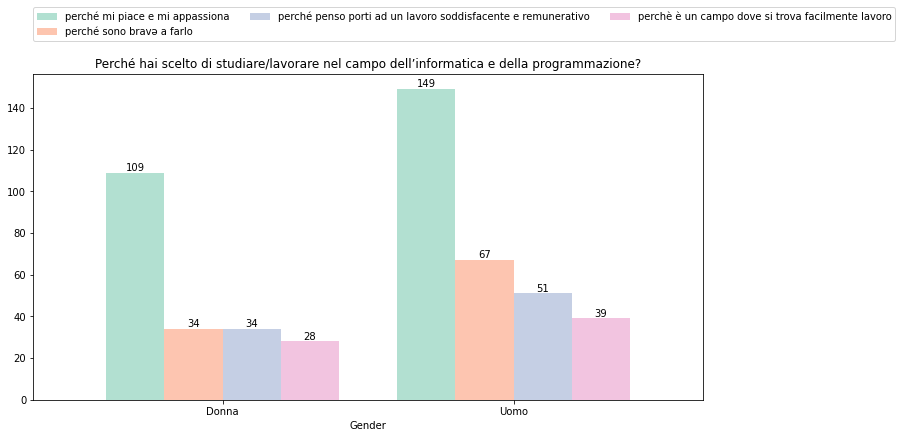

In [20]:
bar_plot(columns=motivations_df.columns.difference(["role_group", "Age"]).tolist(), df=motivations_df, 
         aggregate="sum", groupby_cols=["Gender",], sorted="values", cap_threshold=5,
         figsize=(12, 6), width=0.8, title="Perché hai scelto di studiare/lavorare nel campo dell’informatica e della programmazione?",
         filename="gender-motivations.pdf")

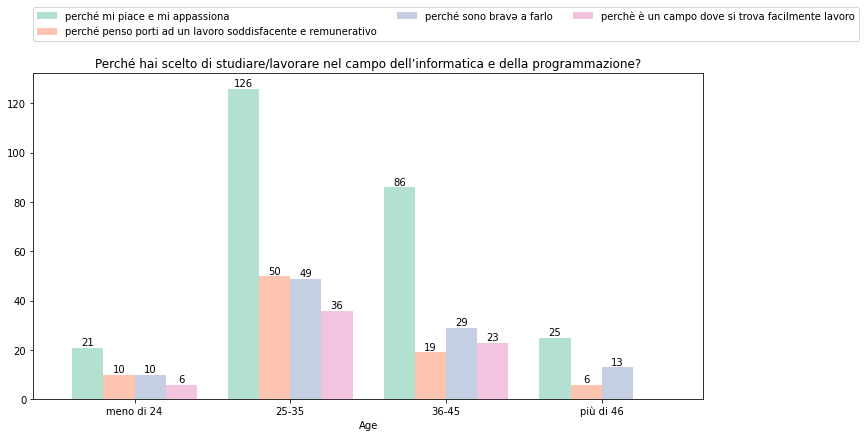

In [21]:
bar_plot(columns=motivations_df.columns.difference(["role_group", "Gender"]).tolist(), df=motivations_df, 
         aggregate="sum", groupby_cols=["Age",], sorted="values", cap_threshold=5,
         figsize=(12, 6), width=0.8, 
         title="Perché hai scelto di studiare/lavorare nel campo dell’informatica e della programmazione?",
         filename="age-motivations.pdf")

In [24]:
fm = motivations_df[motivations_df.columns.difference(["role_group", "Age", "Gender"])].sum()
fm = fm[fm >= 5]
fm.sort_values(ascending=False)

perché mi piace e mi appassiona                                 258
perché sono bravə a farlo                                       101
perché penso porti ad un lavoro soddisfacente e remunerativo     85
perchè è un campo dove si trova facilmente lavoro                67
dtype: int64

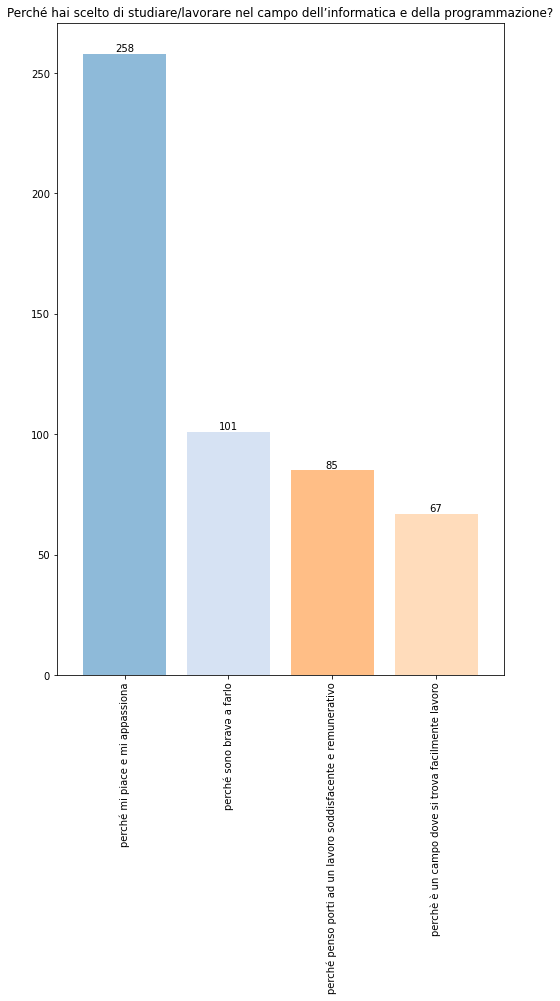

In [26]:
bar_plot(columns=motivations_df.columns.difference(["role_group", "Age", "Gender"]).tolist(), df=motivations_df, 
         aggregate="sum", sorted="values", ticks_rotation=90,
         figsize=(8, 12), width=0.8, cap_threshold=5,
         title="Perché hai scelto di studiare/lavorare nel campo dell’informatica e della programmazione?",
         filename="all-motivations.pdf", legend=False)

**Experience** Analysed per Gender and Age Range

Participants were asked if they ever experienced any of the presented situations. `None of those` was also a possible option.

Multiple options could be chosen, therefore, all _unique_ experience found in the dataset will be analysed and counted for each participant.

**Note**: Different questions were asked depending on the sepecified gender. Therefore, answers will be analysed separately and then compared (in case)

**``Gender == Woman``**

In [28]:
from utils import W_EXPERIENCE

In [35]:
women = answers[answers.Gender == "Donna"]
w_experiences, w_experience_map = process_multiple_choices(women["W-Experience"], choices=W_EXPERIENCE)
w_experiences_data = {"Age": women.Age.values, "role_group": women.role_group.values}
w_experiences_data.update(zip(w_experiences, w_experience_map))
w_experiences_df = pd.DataFrame(w_experiences_data)

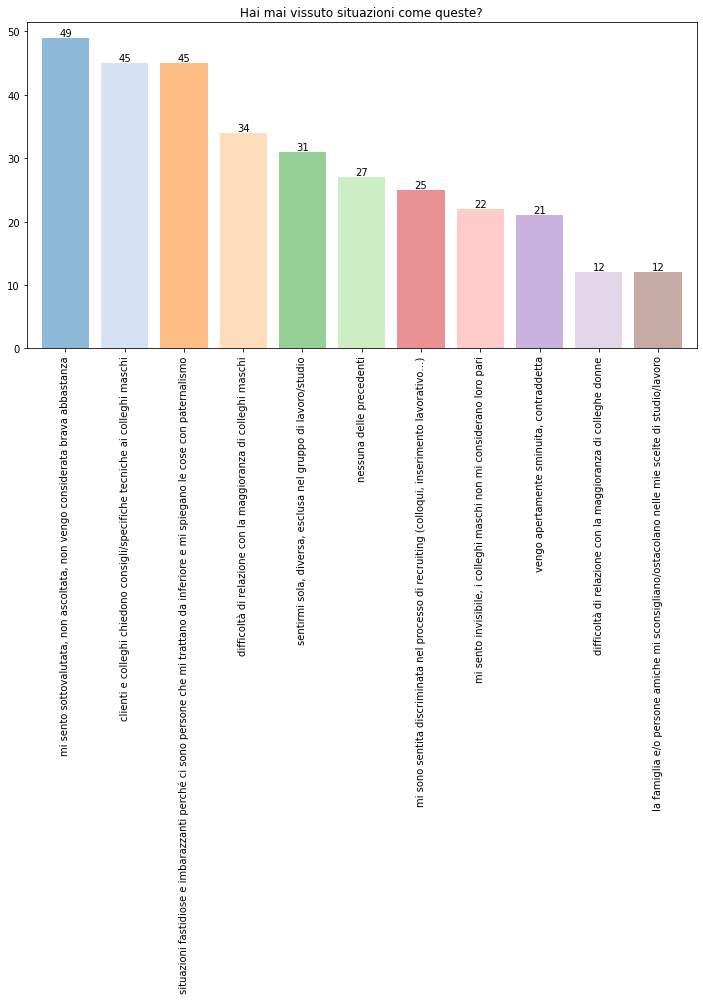

In [45]:
bar_plot(columns=w_experiences_df.columns.difference(["role_group", "Age"]).tolist(), df=w_experiences_df, 
         aggregate="sum", sorted="values", legend=False, cap_threshold=11, ticks_rotation=90,
         figsize=(12, 6), width=0.8, title="Hai mai vissuto situazioni come queste?",
         filename="women_experiences.pdf")

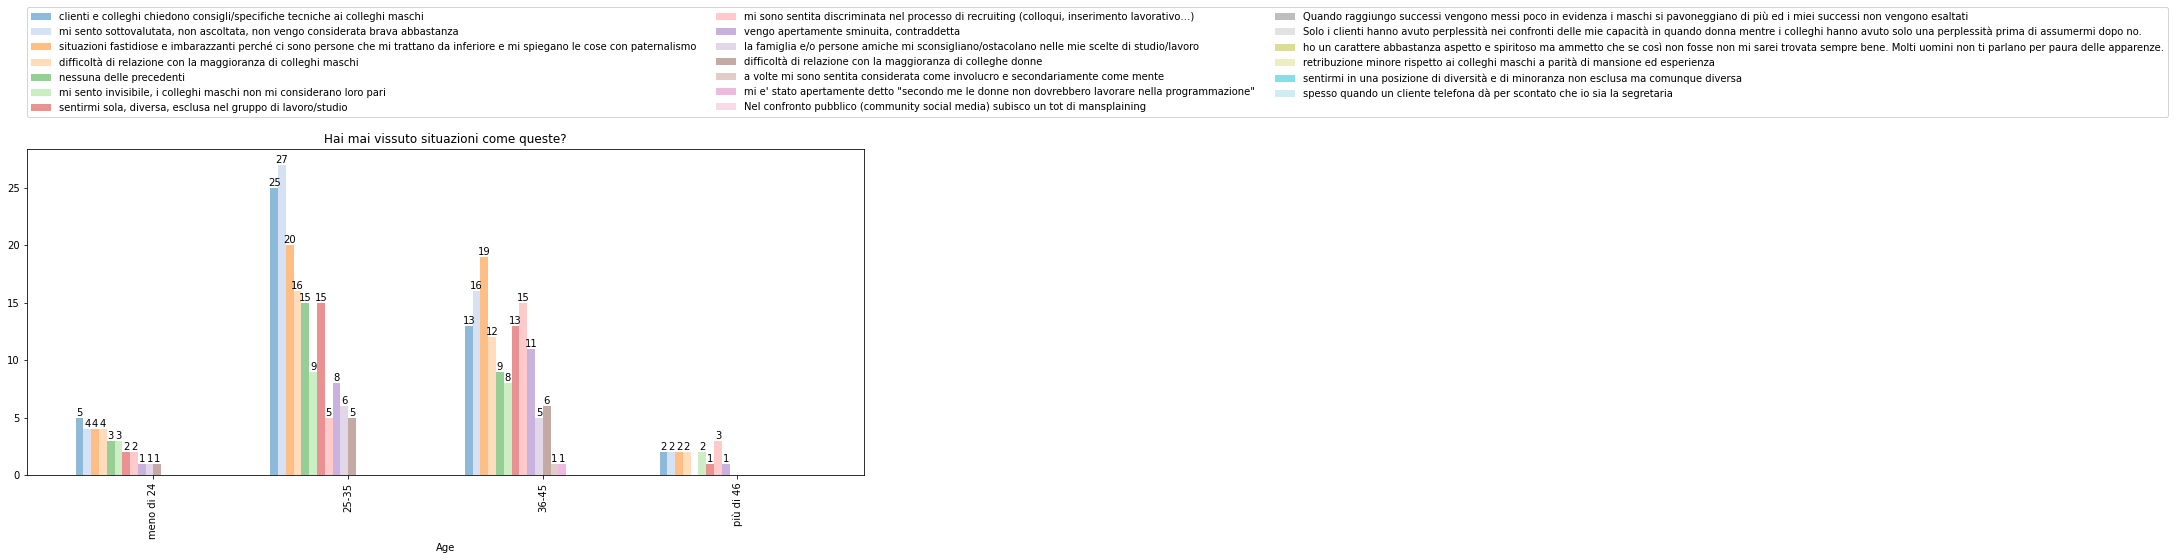

In [50]:
bar_plot(columns=w_experiences_df.columns.difference(["role_group"]).tolist(), df=w_experiences_df, 
         aggregate="sum", groupby_cols=("Age", ), sorted="values", ticks_rotation=90,
         figsize=(15, 6), width=0.8, title="Hai mai vissuto situazioni come queste?",
         filename="women_age_experiences.pdf")

**Discrimination** and **Gender-Gap**

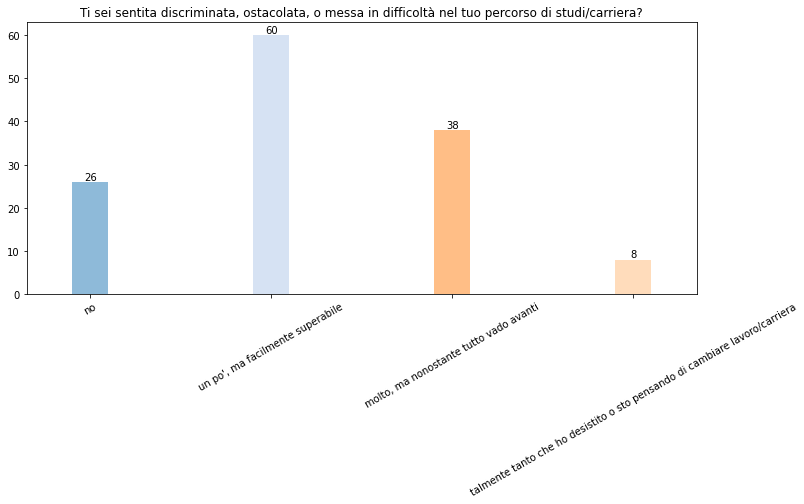

In [58]:
bar_plot(df=answers, columns=["W-Discrimination"], selection=answers.Gender == "Donna", 
         title="Ti sei sentita discriminata, ostacolata, o messa in difficoltà nel tuo percorso di studi/carriera?", filename="discrimination-women.pdf", ticks_rotation=30, width=0.2,
         figsize=(12,5), legend=False)

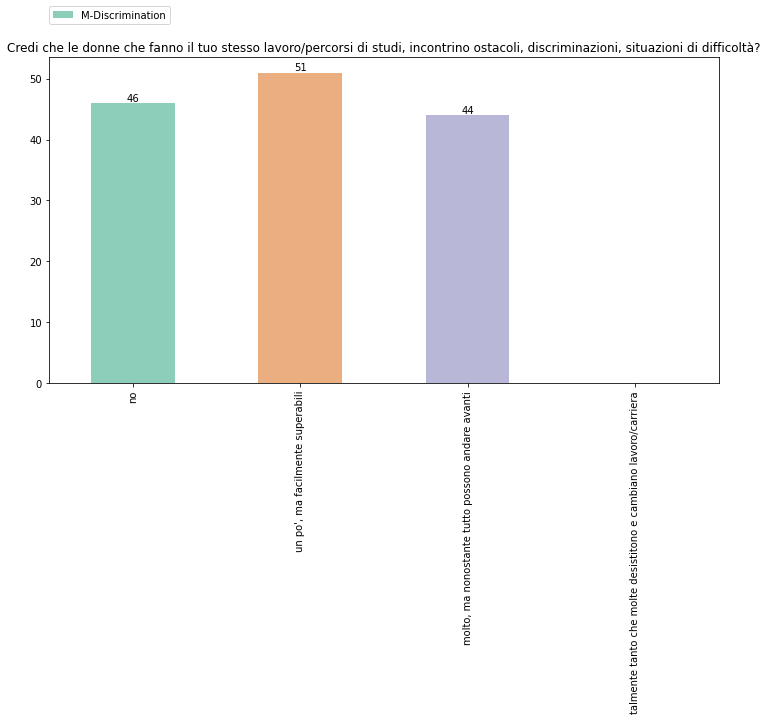

In [28]:
bar_plot(df=answers, columns=["M-Discrimination"], selection=answers.Gender == "Uomo", 
         title="Credi che le donne che fanno il tuo stesso lavoro/percorsi di studi, incontrino ostacoli, discriminazioni, situazioni di difficoltà?", filename="discrimination-men.pdf", 
         ticks_rotation=90)

**FIX Gender Gap**?

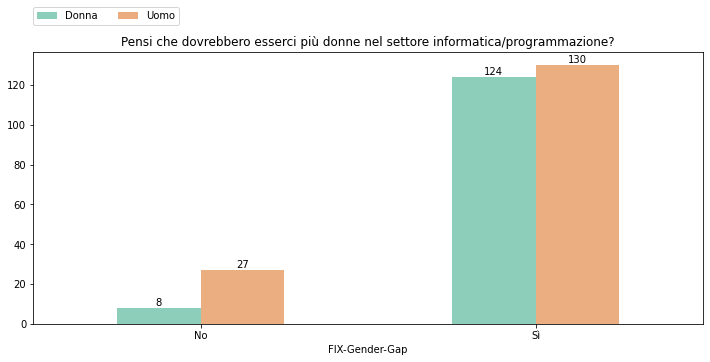

In [29]:
bar_plot(df=answers, columns=["Gender", "FIX-Gender-Gap"], unstack_ord=(0, ),
         title="Pensi che dovrebbero esserci più donne nel settore informatica/programmazione?", filename="gender-gap.pdf", figsize=(12, 5))